# Quick Start

The easiest way to start is to use a Jupyter notebook and review the results as you get them.

Let us start with a very first example:

1. Create a solar system with all planets and Pluto.
2. Add one asteroid 463 Lola.
3. Verify if this asteroid is a resonant one.

## NB

*  Note that the first run might take some time because the app needs to download the AstDys catalogue and the data for the Solar System.
* `sim.dt` is set to `1` to speed up this test run, and `sim.plot` is set to `show` to show the results in the notebook (rather than saving them in PNG).

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')


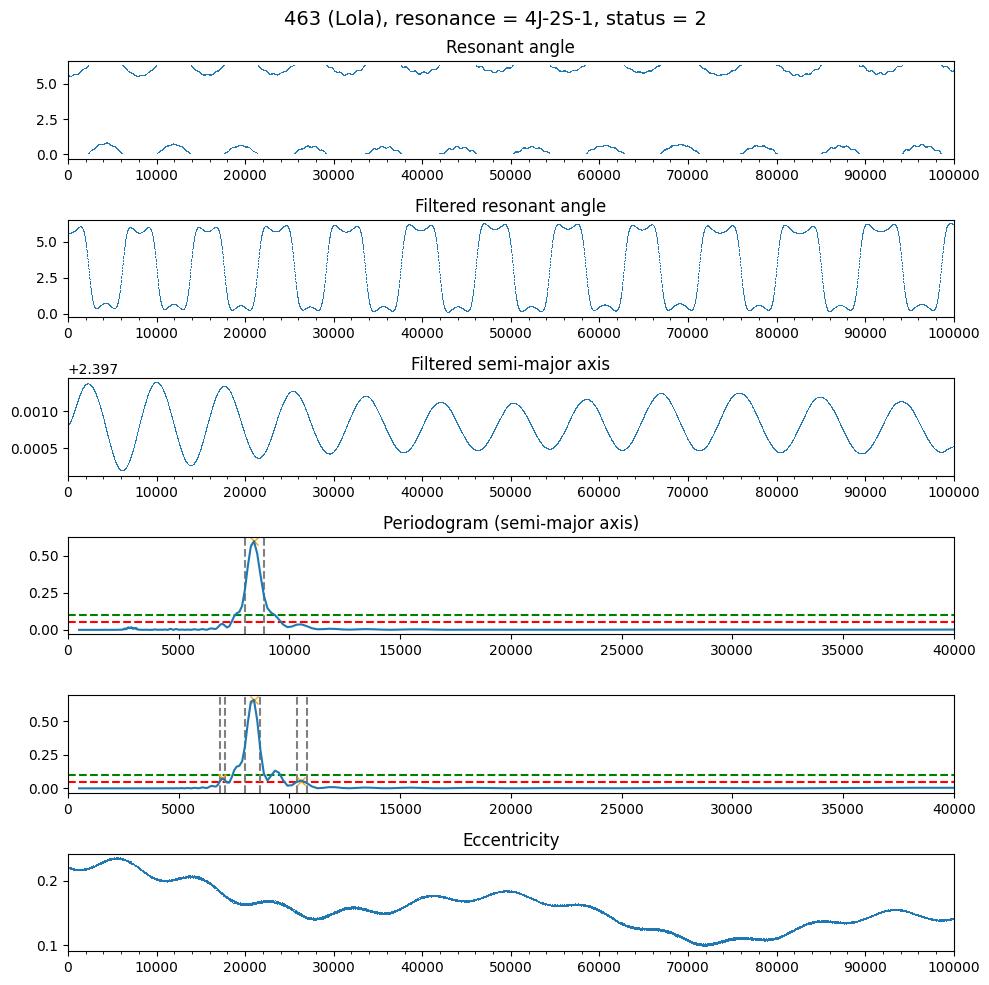

In [1]:
import resonances

sim = resonances.Simulation()
sim.create_solar_system()
sim.add_body('463', resonances.create_mmr('4J-2S-1'), name='463 (Lola)')
sim.dt = 1
sim.plot = 'show'
sim.run()

You might see on the plot:

- the resonant angle vs time,
- the filtered values of the resonant angle and semi-major axis vs time,
- the periodograms of both variables, eccentricity vs time.

As expected, the asteroid 463 Lola is in three-body body mean-motion resonance with Jupiter and Saturn, which is defined in the code `4J-2S-1` (`J` means Jupiter, `S` means Saturn, `4`, `-2`, and `-1` are integers), because the resonant angle librates and the periodograms have a shared peak around `11000` years.

Now you can check other asteroids (just change their titles) or resonances. If you need a better precision, do not hesitate to remove `sim.dt=1` (to use the default value `0.1`).

## What's next

- There are a few more examples in the [Simulation and Bodies](core.ipynb) Section.
- The description of how the resonance identification procedure works are in [Libration](libration.md) Section.
- The description of default config values and how to change them is in [Config](config.md).
- A few examples of some tasks, i.e. identification of the resonances for the given asteroid, are in [Advanced](console.md) Section.